<a href="https://colab.research.google.com/github/Aabha-J/Pytorch/blob/main/Multi_Class_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import torch
import torch.nn as nn
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [8]:
#  Import some function using requets to plot testing and training results
import requests

from pathlib import Path

#Dowalonad function to visualize what is happening if it doesn't already exist

if Path('helper_functions.py').is_file():
  print("helper functions already there")

else:
  print('Downloading helper functions')
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper functions already there


##Data
Import and split data using sklearn

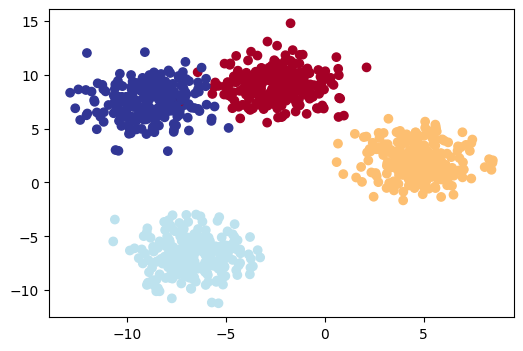

In [9]:
num_classes = 4
num_features = 2

#Create data
X_blob, y_blob = make_blobs(n_samples = 1000, n_features = num_features
,                             centers = num_classes, cluster_std = 1.5, random_state=42)

X_blob, y_blob = torch.from_numpy(X_blob).type(torch.float), torch.from_numpy(y_blob).type(torch.LongTensor)

X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size = 0.2)


plt.figure(figsize=(6,4))
plt.scatter(X_blob[:,0], X_blob[:,1], c= y_blob, cmap = plt.cm.RdYlBu)

In [17]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'


## Create the Model

In [18]:
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features =hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features =output_features)
    )

  def forward(self,x):
    return self.layer_stack(x)

In [19]:
hidden = 8
model_4 = BlobModel(num_features, num_classes, hidden).to(device)

The loss and optimizer

In [20]:
optimizer = torch.optim.SGD(params = model_4.parameters(), lr=0.01)
loss_fn = nn.CrossEntropyLoss()

In [21]:
#Move all training and test data to GPU
X_blob_train, X_blob_test = X_blob_train.to(device), X_blob_test.to(device)
y_blob_train, y_blob_test = y_blob_train.to(device), y_blob_test.to(device)

In [22]:
epochs = 250

for epoch in range(epochs):
  model_4.train()

  y_logits = model_4(X_blob_train)
  y_pred = torch.softmax(y_logits, dim = 1).argmax(dim = 1)

  loss = loss_fn(y_logits, y_blob_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_4.eval()

  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_pred = torch.softmax(test_logits, dim = 1).argmax(dim = 1)
    test_loss = loss_fn(test_logits, y_blob_test)


  if epoch %25 == 0:
    print(f"Epoch: {epoch} | loss: {loss} | epoch_loss {test_loss}")

Epoch: 0 | loss: 2.5293033123016357 | epoch_loss 2.5828280448913574
Epoch: 25 | loss: 1.202781319618225 | epoch_loss 1.0954655408859253
Epoch: 50 | loss: 1.0491970777511597 | epoch_loss 0.9556975364685059
Epoch: 75 | loss: 0.8957775831222534 | epoch_loss 0.8223904371261597
Epoch: 100 | loss: 0.7342430353164673 | epoch_loss 0.6870874166488647
Epoch: 125 | loss: 0.5805023908615112 | epoch_loss 0.5605682134628296
Epoch: 150 | loss: 0.45150092244148254 | epoch_loss 0.45214301347732544
Epoch: 175 | loss: 0.35411491990089417 | epoch_loss 0.3656805753707886
Epoch: 200 | loss: 0.2829822897911072 | epoch_loss 0.2989700436592102
Epoch: 225 | loss: 0.23048564791679382 | epoch_loss 0.24751944839954376


In [23]:
model_4.eval()

with torch.inference_mode():
  y_logits = model_4(X_blob_test)
  y_pred = torch.softmax(y_logits, dim = 1).argmax(dim = 1)

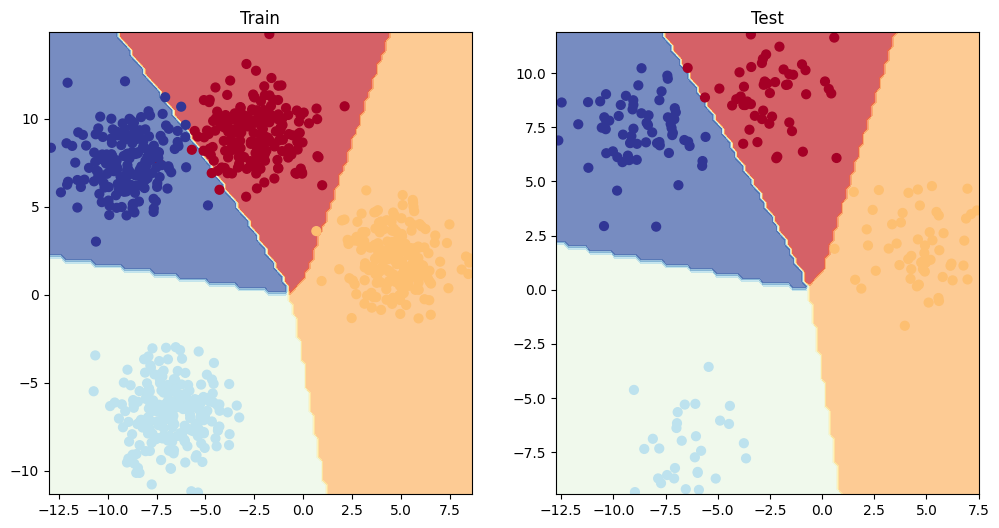

In [27]:
plt.figure(figsize = (12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)